# <center> Netflix EDA and Movie Recommendation System

## 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


### Reading Data

In [2]:
df=pd.read_csv("/Users/Michela/Documents/IDS/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,budget,revenue,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,30000000,373554033.0,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,65000000,262797249.0,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,0,0.0,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,16000000,81452156.0,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,0,76578911.0,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape 

(8808, 14)

In [4]:
df[['title','listed_in']]

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries"
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act..."
3,Jailbirds New Orleans,"Docuseries, Reality TV"
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8803,Zombie Dumb,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Zombieland,"Comedies, Horror Movies"
8805,Zoom,"Children & Family Movies, Comedies"
8806,Zubaan,"Dramas, International Movies, Music & Musicals"


In [5]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

## 2. Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      6173 non-null   object 
 4   cast          7982 non-null   object 
 5   country       7976 non-null   object 
 6   date_added    8797 non-null   object 
 7   release_year  8807 non-null   float64
 8   rating        8803 non-null   object 
 9   budget        8808 non-null   int64  
 10  revenue       8807 non-null   float64
 11  duration      8804 non-null   object 
 12  listed_in     8807 non-null   object 
 13  description   8807 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 963.5+ KB


### --> Checking for missing values

In [7]:
df.isnull().sum()

show_id            1
type               1
title              1
director        2635
cast             826
country          832
date_added        11
release_year       1
rating             5
budget             0
revenue            1
duration           4
listed_in          1
description        1
dtype: int64

### --> Handling missing values

In [8]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['country'].mode()[0])
df.isnull().sum()

show_id            1
type               1
title              1
director        2635
cast             826
country            0
date_added         0
release_year       1
rating             0
budget             0
revenue            1
duration           4
listed_in          1
description        1
dtype: int64

In [9]:
df = df.dropna( how='any',subset=['cast', 'director','duration'])
    
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
budget          0
revenue         0
duration        0
listed_in       0
description     0
dtype: int64

- All the missing values in the dataset have either been removed or filled. There are no missing values left.

In [10]:
df.duplicated().sum()

0

- dataset has 0 duplicated values.

### --> Cleaning the data

Adding some new columns:
- listed_in - Genre
* Year Added - year_add
* Month Added - month_add
* Princial Country - country_main 

In [11]:
#Rename the 'listed_in' column as 'Genre' for easy understanding
df = df.rename(columns={"listed_in":"Genre"})
df['Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])
df['Genre'].head()

2              Crime TV Shows
5                   TV Dramas
6    Children & Family Movies
7                      Dramas
8            British TV Shows
Name: Genre, dtype: object

In [12]:
df['year_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_add'].head()

2    2021
5    2021
6    2021
7    2021
8    2021
Name: year_add, dtype: object

In [13]:
df['month_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_add'].head()

2    September
5    September
6    September
7    September
8    September
Name: month_add, dtype: object

In [14]:
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

2     United States
5     United States
6     United States
7     United States
8    United Kingdom
Name: country_main, dtype: object

In [15]:
df['type'].value_counts()

Movie      5519
TV Show     178
Name: type, dtype: int64

In [16]:
df['rating'].value_counts()

TV-MA            1939
TV-14            1329
R                 789
PG-13             477
TV-PG             456
PG                279
TV-Y7             123
TV-Y              102
TV-G               96
NR                 58
G                  40
UR                  3
TV-Y7-FV            3
NC-17               2
United States       1
Name: rating, dtype: int64

-- Making two new dataframes, one with movies collection and other with TV shows collection:
* movie_df
* tv_df

In [17]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [18]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,budget,revenue,duration,Genre,description,year_add,month_add,country_main
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021.0,PG,58000000,0.0,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993.0,TV-MA,0,0.0,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021.0,PG-13,58000000,352194034.0,104 min,Comedies,A woman adjusting to life after a loss contend...,2021,September,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021.0,TV-MA,0,11348324.0,127 min,Dramas,After most of her family is murdered in a terr...,2021,September,Germany
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,"September 22, 2021",2021.0,TV-PG,44000000,13681765.0,91 min,Children & Family Movies,When the clever but socially-awkward Tetê join...,2021,September,United States


### Handling Outliers

<AxesSubplot:xlabel='revenue'>

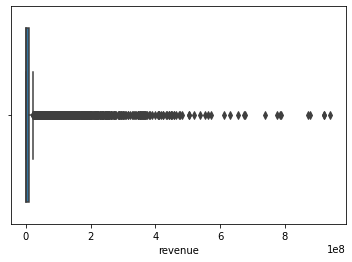

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='revenue', data=df)

<AxesSubplot:xlabel='budget'>

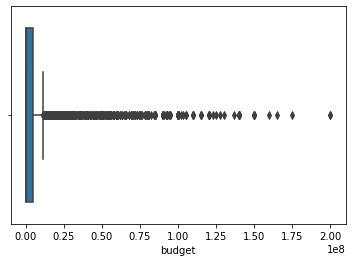

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='budget', data=df)

## 3. Exploratory Data Analysis

### --> Number of Movies vs TV Shows

<AxesSubplot:xlabel='type', ylabel='count'>

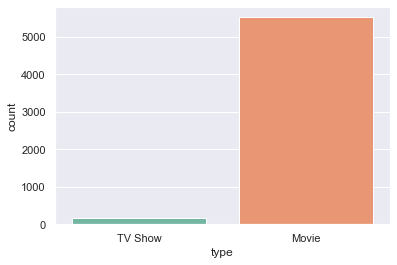

In [21]:
sns.set(style="darkgrid")
sns.countplot(x="type", data= df, palette="Set2")

- Movies/TV shows were mostly released after 2010

### --> Ratings analysis

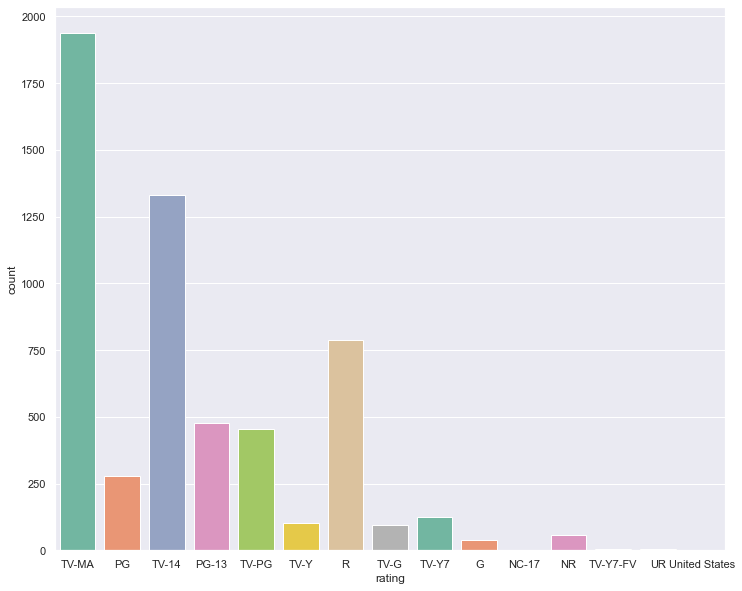

In [22]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Set2")

- Movies/TV shows are mostly TV-MA rated

### --> Movies Ratings analysis

<AxesSubplot:xlabel='rating', ylabel='count'>

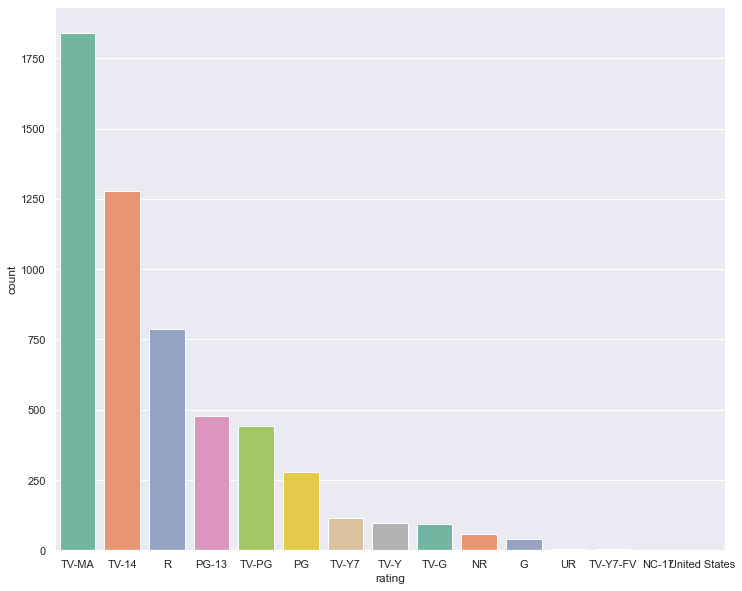

In [23]:
#MOVIES RATINGS
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="rating", data= movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:15])

### -->  TV Shows Ratings analysis

<AxesSubplot:xlabel='rating', ylabel='count'>

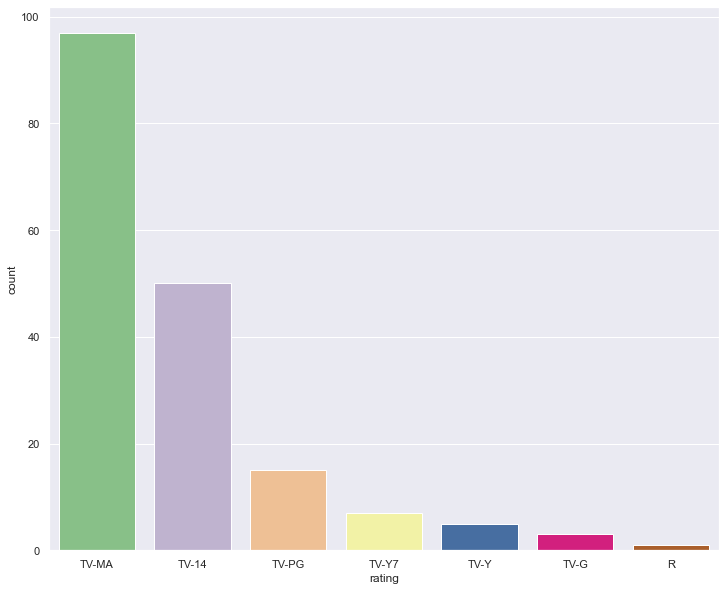

In [24]:
# TV SHOWS RATINGS
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:15])

### -> Period of years movies/tv shows were released in

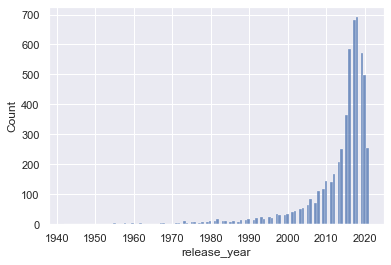

In [25]:
import seaborn as sns
sns.histplot(x='release_year', data=df, )
sns.set(rc={'figure.figsize':(20,27)})
plt.show()

- There are more Movies on Netflix than TV shows.

### --> Yearly Analysis of content

<AxesSubplot:xlabel='count', ylabel='release_year'>

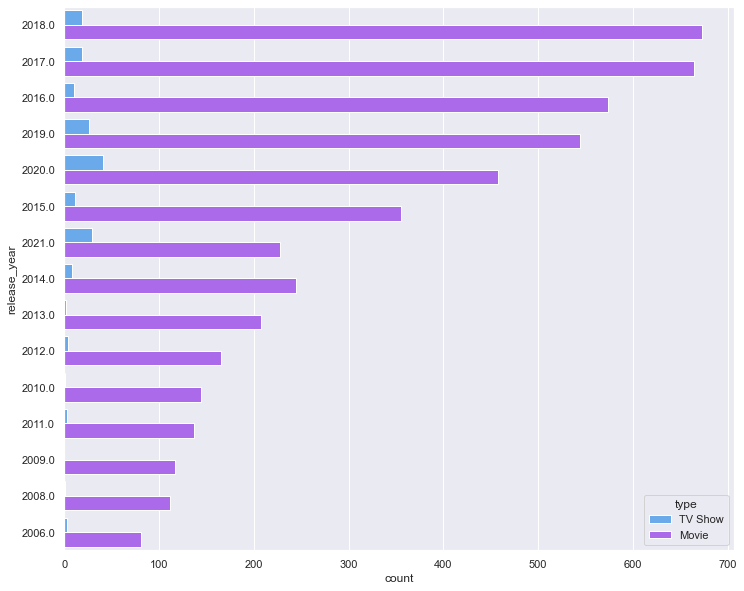

In [26]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(y="release_year", data= df, palette="cool", order= df['release_year'].value_counts().index[0:15],hue=df['type'])

### -->Understanding what content is available in different countries

In [29]:
# Different Genres from Countries
columns=['Genre','country_main']
gen_country = df [columns]

In [30]:
gen_country.head()

,Genre,country_main
2,Crime TV Shows,United States
5,TV Dramas,United States
6,Children & Family Movies,United States
7,Dramas,United States
8,British TV Shows,United Kingdom


In [31]:
gen_country['Genre'].value_counts()

Dramas                          1586
Comedies                        1184
Action & Adventure               848
Children & Family Movies         548
Documentaries                    397
Stand-Up Comedy                  309
Horror Movies                    274
International Movies             122
Classic Movies                    73
Thrillers                         65
International TV Shows            59
Crime TV Shows                    37
Movies                            27
British TV Shows                  21
Independent Movies                20
Anime Features                    19
Music & Musicals                  18
Sci-Fi & Fantasy                  13
Cult Movies                       12
Anime Series                      11
Kids' TV                          11
Docuseries                        10
TV Shows                           9
Stand-Up Comedy & Talk Shows       8
Romantic Movies                    3
TV Comedies                        3
TV Action & Adventure              2
C

In [32]:
size = gen_country['Genre'].value_counts().tolist()
size

[1586,
 1184,
 848,
 548,
 397,
 309,
 274,
 122,
 73,
 65,
 59,
 37,
 27,
 21,
 20,
 19,
 18,
 13,
 12,
 11,
 11,
 10,
 9,
 8,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1]

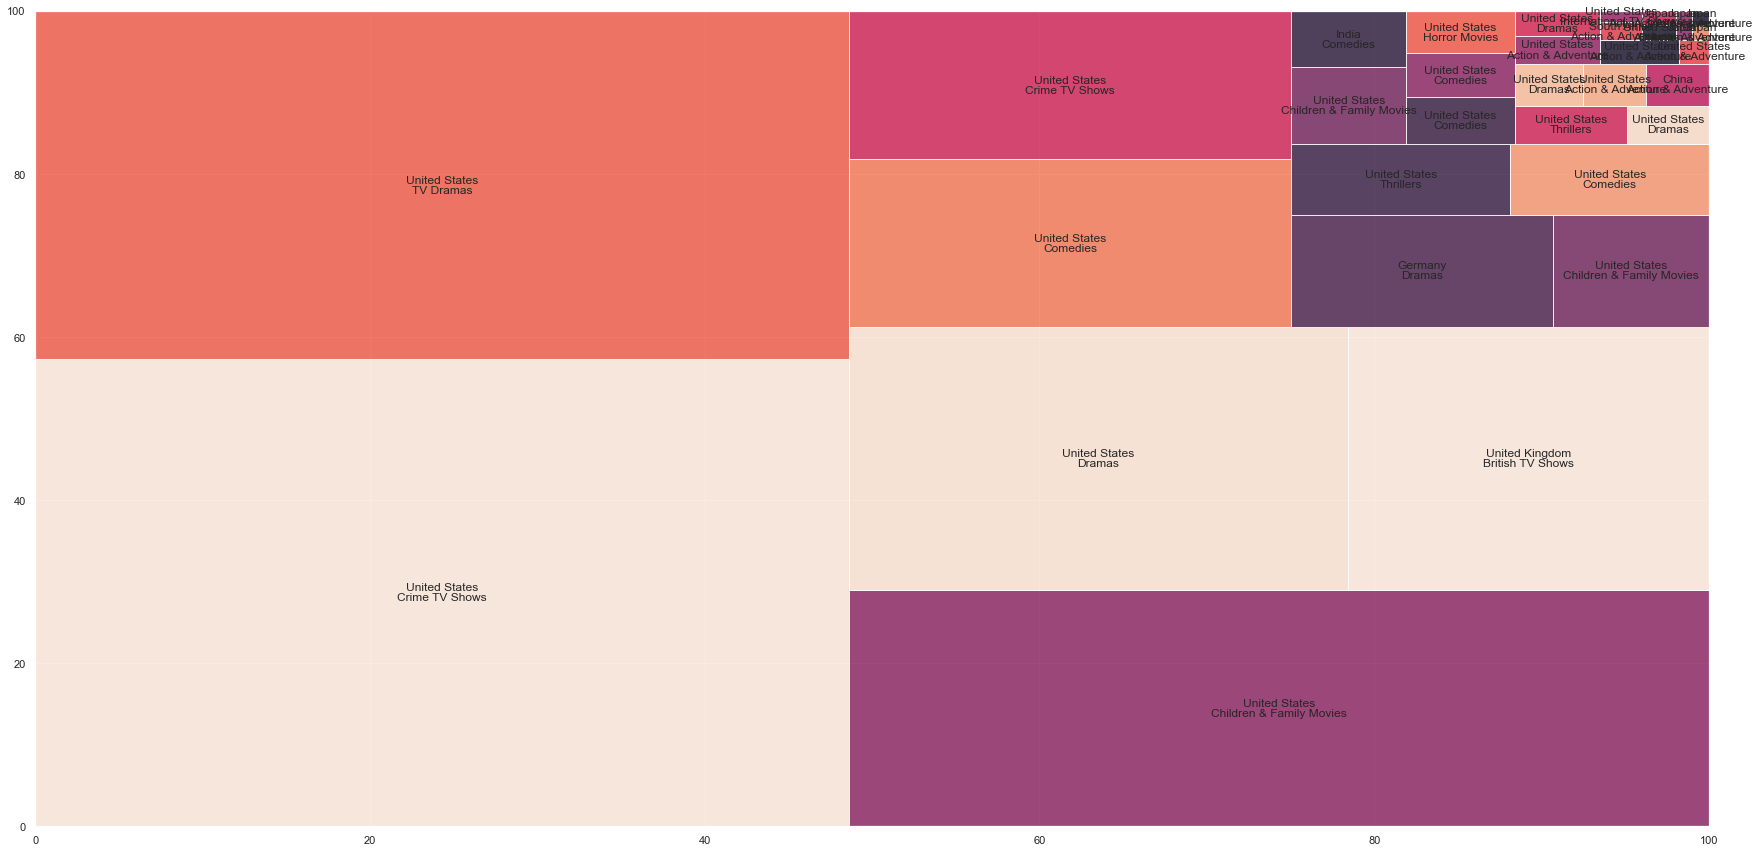

In [33]:
# GENRES BY COUNTRIES
import squarify
plt.figure(figsize=(30,15))
squarify.plot(value= gen_country['Genre'], label= gen_country['country_main'], sizes= size, alpha=0.8)
plt.rc('font', size=14)
plt.show()

- United states produces most amount of content in 'Comedies' and 'Childern & Family movies' Genres.

### --> Analysis between budget and revenue

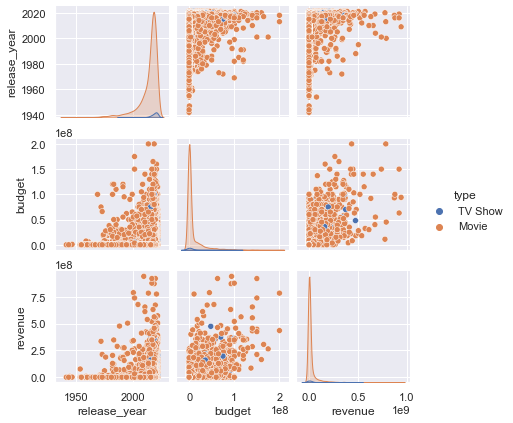

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='type', height=2)

### --> Analysis of TV Shows with most number of seasons

In [35]:
tv_df['duration']=tv_df['duration'].str.replace(' Season','')
tv_df['duration']=tv_df['duration'].str.replace('s','')
tv_df['duration']=tv_df['duration'].astype(str).astype(int)
tv_df['duration']

2       1
5       1
8       9
11      1
47      1
       ..
8172    1
8214    1
8293    1
8302    1
8599    3
Name: duration, Length: 178, dtype: int32

In [36]:
#Extract the columns from tv_df
columns=['title','duration']
tv_shows = tv_df[columns]

In [37]:
#sort the dataframe by number of seasons
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows
top20 = tv_shows[0:20]
top20

,title,duration
2423,Supernatural,15
3541,Naruto,9
8,The Great British Baking Show,9
1998,Call the Midwife,9
2947,Arrow,8
7896,Royal Pains,8
380,The Flash,7
3653,Comedians in Cars Getting Coffee,6
1173,Men on a Mission,6
6742,Father Brown,6


<AxesSubplot:xlabel='title'>

<Figure size 1440x432 with 0 Axes>

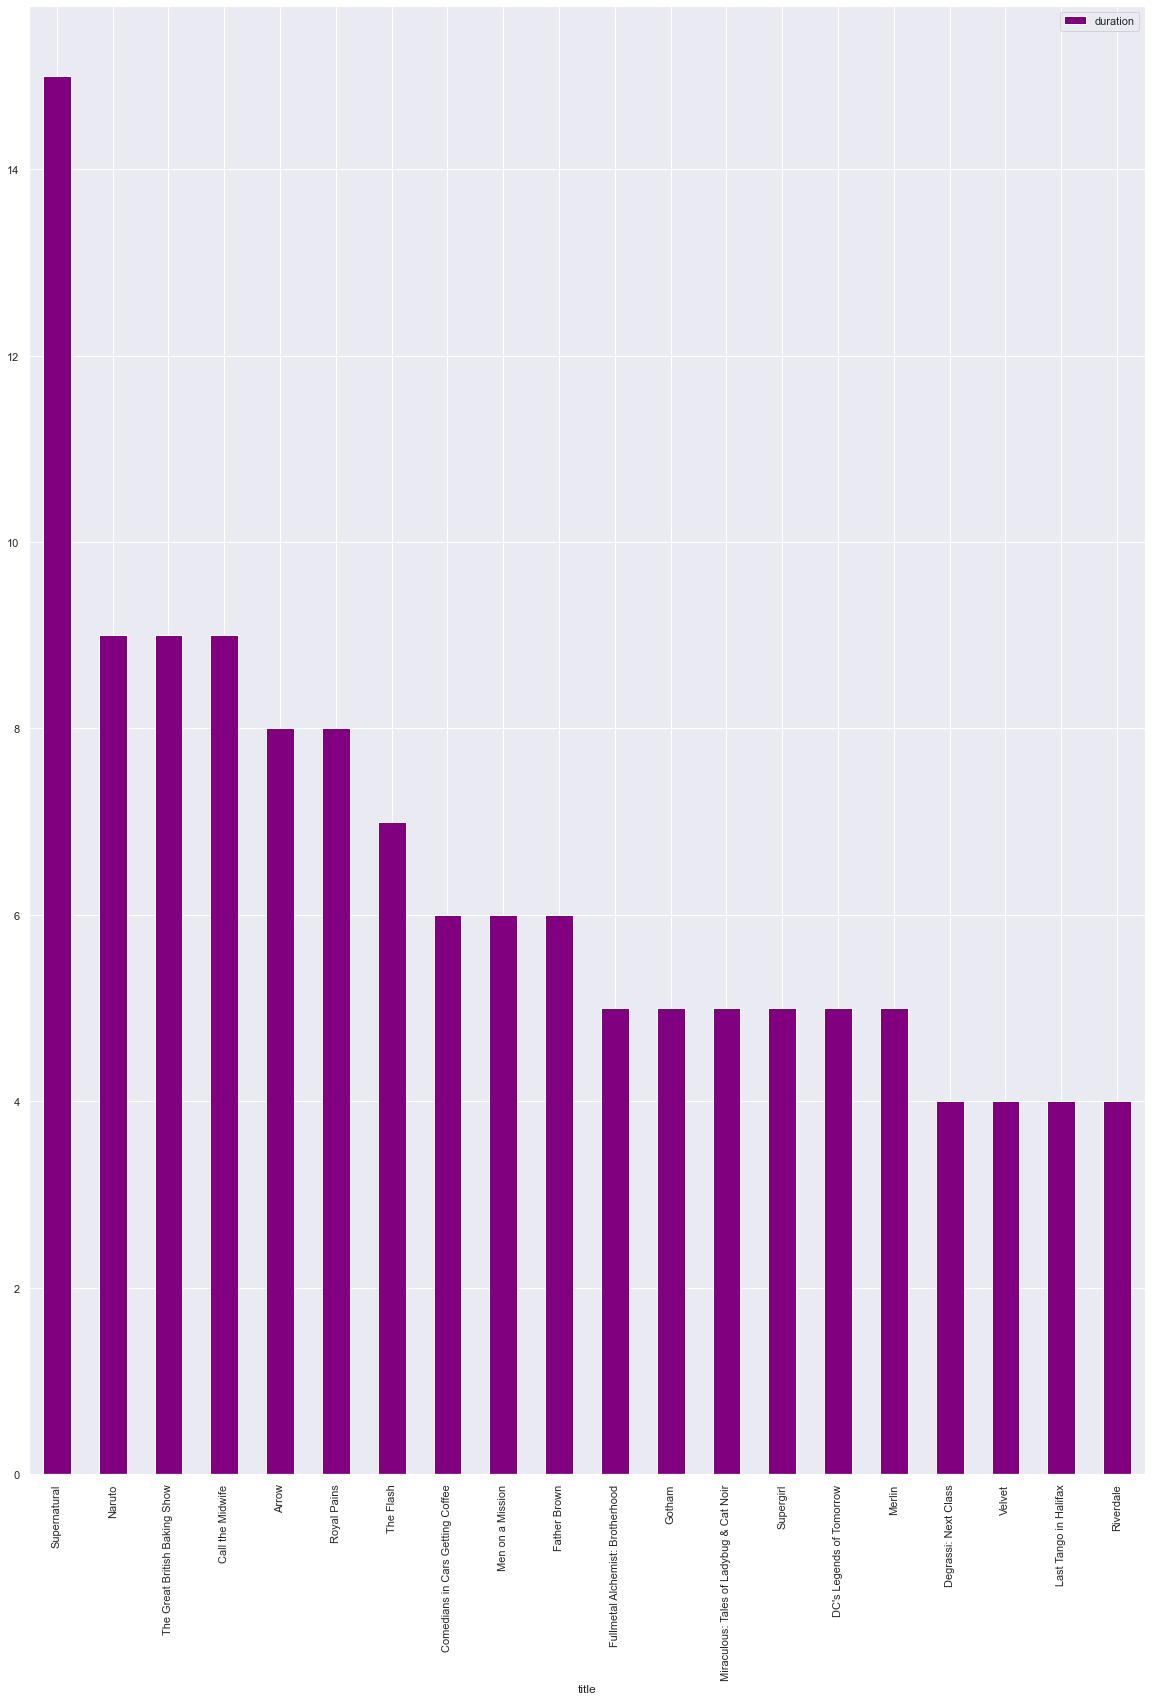

In [38]:
plt.figure(figsize=(20,6))
top20.plot(kind='bar',x='title',y='duration', color='purple')

- **Supernatural , Naruto** has the highest numbers of seasons

### --> Countries on top for movies content creation

<AxesSubplot:xlabel='country_main', ylabel='count'>

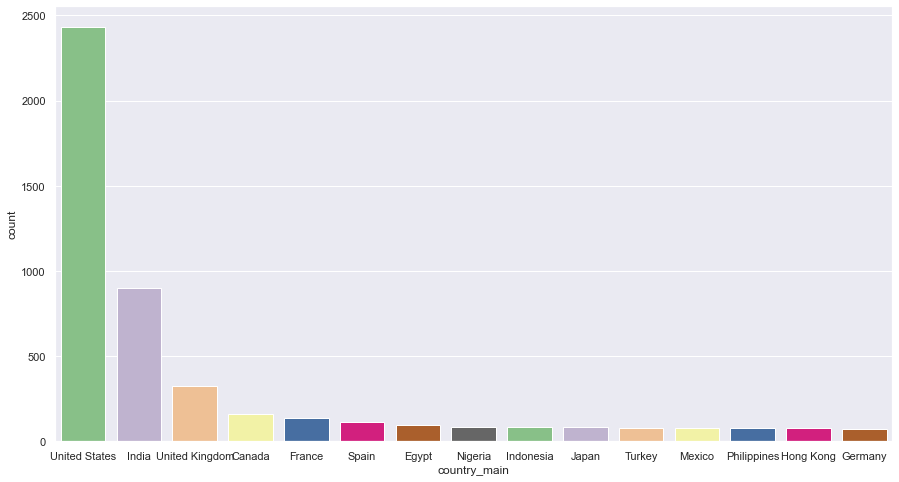

In [40]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(x="country_main", data=movie_df, palette="Accent", order=movie_df['country_main'].value_counts().index[0:15])

### --> Countries on top for TV Show content creation

<AxesSubplot:xlabel='country_main', ylabel='count'>

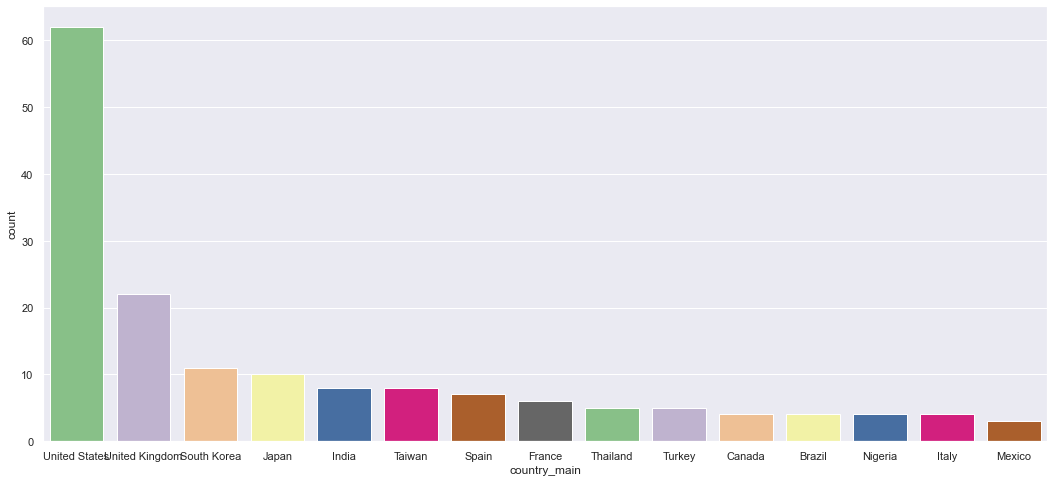

In [41]:
plt.figure(figsize=(18,8))
sns.set(style="darkgrid")
sns.countplot(x="country_main", data=tv_df, palette="Accent", order=tv_df['country_main'].value_counts().index[0:15])

### --> Directors with most number of Movies produced

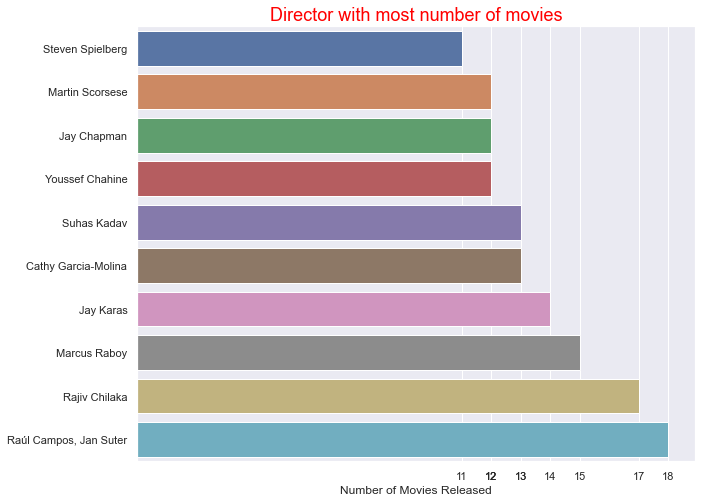

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(y= movie_df.director.value_counts()[:10].sort_values().index, x=movie_df.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of movies', color='red', fontsize=18)
plt.xticks(movie_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Movies Released');


### --> Most Popular Genre on Netflix

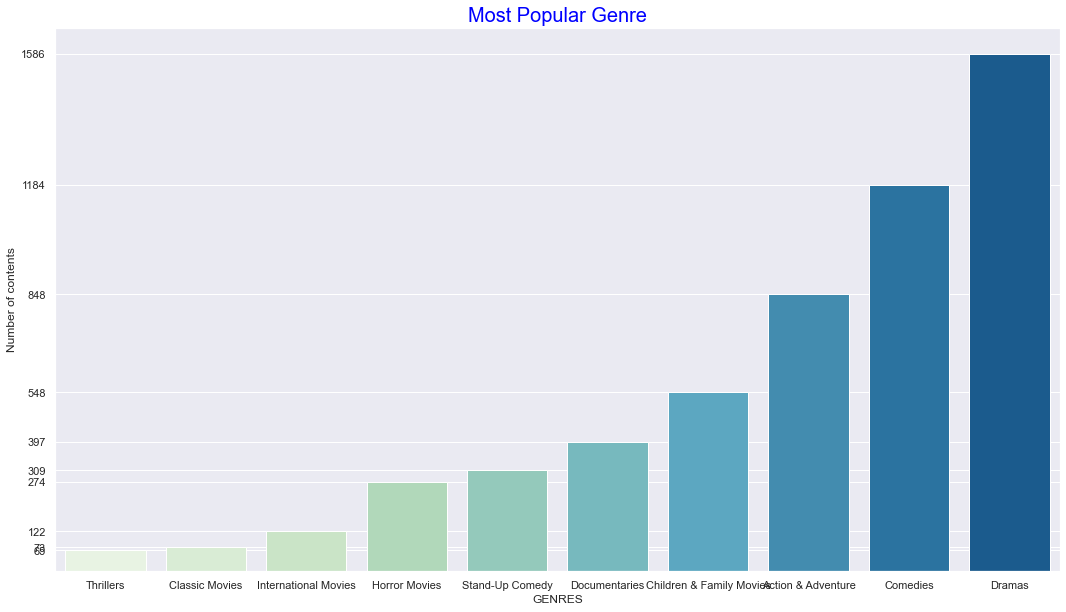

In [44]:
plt.figure(figsize=(18,10))
sns.barplot(x= df.Genre.value_counts()[:10].sort_values().index, y=df.Genre.value_counts()[:10].sort_values().values,palette='GnBu');
plt.title('Most Popular Genre', color='Blue', fontsize=20)
plt.yticks(df.Genre.value_counts()[:10].sort_values().values);
plt.xlabel('GENRES');
plt.ylabel('Number of contents');

## 4. Netflix Recommendation System

- For this recommender system the content of the movie (cast, description, director,genre etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

![](https://miro.medium.com/max/998/1*O_GU8xLVlFx8WweIzKNCNw.png)

## Plot description based Recommender

- We will calculate similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **description** feature of our dataset.

In [46]:
df['description'].head()

2    To protect his family from a powerful drug lor...
5    The arrival of a charismatic young priest brin...
6    Equestria's divided. But a bright-eyed hero be...
7    On a photo shoot in Ghana, an American model s...
8    A talented batch of amateur bakers face off in...
Name: description, dtype: object

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [48]:
#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(5697, 14765)

In [49]:
tfidf_matrix

<5697x14765 sparse matrix of type '<class 'numpy.float64'>'
	with 78429 stored elements in Compressed Sparse Row format>

In [50]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [51]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [52]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [53]:
get_recommendations('3 Idiots')

3223                          Defiance
177               The Guns of Navarone
1138                       The Pianist
8291                     The Exception
1378                     Penguin Bloom
2059                            Adrift
4646                        On My Skin
4082    The Photographer Of Mauthausen
786                  Company of Heroes
1288                  Operation Finale
Name: title, dtype: object

In [54]:
get_recommendations('PK')

6592                                  Den of Thieves
3494                         Inside Man: Most Wanted
6467                                     Chief Daddy
2117                          Crazy Awesome Teachers
8665                                            Urvi
7137                                        John Day
58      Naruto Shippûden the Movie: The Will of Fire
2375                                 The Blazing Sun
195                  EMI: Liya Hai To Chukana Padega
2424                 The Last Days of American Crime
Name: title, dtype: object

In [55]:
get_recommendations('Kung Fu Panda')

6736                        Familiye
7951                        Say When
1311                  Namaste Wahala
5308                           Rocco
4152                       Bhasmasur
4411                     Bucket List
3739                          Luckee
6230    Bangkok Traffic (Love) Story
8302                        The Five
2483         Fifty Year Old Teenager
Name: title, dtype: object

## Multiple metrics(Genre,cast,director)  based Recommender System

From the Genre,cast and director features, we need to extract the three most important actors, the director and genres associated with that movie.

In [57]:
features=['Genre','director','cast','description','title']
filters = df[features]

In [58]:
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(":", ""))

In [59]:
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

,Genre,director,cast,description,title
2,crime tv shows,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",to protect his family from a powerful drug lor...,ganglands
5,tv dramas,mike flanagan,"kate siegel, zach gilford, hamish linklater, h...",the arrival of a charismatic young priest brin...,midnight mass
6,children & family movies,"robert cullen, josé luis ucha","vanessa hudgens, kimiko glenn, james marsden, ...",equestria's divided. but a bright-eyed hero be...,my little pony a new generation
7,dramas,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","on a photo shoot in ghana, an american model s...",sankofa
8,british tv shows,andy devonshire,"mel giedroyc, sue perkins, mary berry, paul ho...",a talented batch of amateur bakers face off in...,the great british baking show


- We can now create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer.

In [60]:
def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['Genre']+' '+ x['description']

In [61]:
filters['soup'] = filters.apply(create_soup, axis=1)

In [62]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

In [63]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [64]:
filters

,Genre,director,cast,description,title,soup
2,crime tv shows,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",to protect his family from a powerful drug lor...,ganglands,"julien leclercq sami bouajila, tracy gotoas, s..."
5,tv dramas,mike flanagan,"kate siegel, zach gilford, hamish linklater, h...",the arrival of a charismatic young priest brin...,midnight mass,"mike flanagan kate siegel, zach gilford, hamis..."
6,children & family movies,"robert cullen, josé luis ucha","vanessa hudgens, kimiko glenn, james marsden, ...",equestria's divided. but a bright-eyed hero be...,my little pony a new generation,"robert cullen, josé luis ucha vanessa hudgens,..."
7,dramas,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","on a photo shoot in ghana, an american model s...",sankofa,"haile gerima kofi ghanaba, oyafunmike ogunlano..."
8,british tv shows,andy devonshire,"mel giedroyc, sue perkins, mary berry, paul ho...",a talented batch of amateur bakers face off in...,the great british baking show,"andy devonshire mel giedroyc, sue perkins, mar..."
...,...,...,...,...,...,...
8801,dramas,majid al ansari,"ali suliman, saleh bakri, yasa, ali al-jabri, ...",recovering alcoholic talal wakes up inside a s...,zinzana,"majid al ansari ali suliman, saleh bakri, yasa..."
8802,cult movies,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...","a political cartoonist, a crime reporter and a...",zodiac,"david fincher mark ruffalo, jake gyllenhaal, r..."
8804,comedies,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",looking to survive in a world taken over by zo...,zombieland,"ruben fleischer jesse eisenberg, woody harrels..."
8805,children & family movies,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...","dragged from civilian life, a former superhero...",zoom,"peter hewitt tim allen, courteney cox, chevy c..."


In [65]:
# Reset index of our main DataFrame and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [66]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
#     title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [67]:
get_recommendations_new('a cinderella story', cosine_sim2)

6041                                 A Holiday Engagement
1151                         Octonauts & the Ring of Fire
1024                               Arlo the Alligator Boy
7594                   Norm of the North: Family Vacation
1859                   Octonauts & the Great Barrier Reef
6798                                           Free Willy
8159    Teenage Mutant Ninja Turtles II: The Secret of...
7008                Hotel Transylvania 3: Summer Vacation
6243                              Barbie: Video Game Hero
2858    Calico Critters: Everyone's Big Dream Flying i...
Name: title, dtype: object

In [68]:
get_recommendations_new('you', cosine_sim2)

7112                     Jack Taylor
2939                      Horse Girl
7670              Operation Chromite
5852                            Hush
3928                         Persona
6392                         Burning
3461              Cheese in the Trap
2602    The Forest of Love: Deep Cut
5555                 Hoff the Record
739                      Wish Dragon
Name: title, dtype: object

In [69]:
get_recommendations_new('naruto', cosine_sim2)

56               Naruto Shippuden the Movie: Blood Prison
7559                      Naruto Shippuden : Blood Prison
57                      Naruto Shippûden the Movie: Bonds
63      Naruto the Movie: Ninja Clash in the Land of Snow
59                            Naruto Shippuden: The Movie
58           Naruto Shippûden the Movie: The Will of Fire
62      Naruto the Movie 3: Guardians of the Crescent ...
5096                     Fullmetal Alchemist: Brotherhood
61       Naruto the Movie 2: Legend of the Stone of Gelel
1432                                 The Idhun Chronicles
Name: title, dtype: object

In [71]:
get_recommendations_new('3 idiots', cosine_sim2)

4660                    PK
4565    Ek Main Aur Ekk Tu
4732       Rang De Basanti
8695     War Chhod Na Yaar
3131        Dil Chahta Hai
7590              No Entry
7189                Khushi
4507                 Sanju
2545       Andaz Apna Apna
3132       Dil Dhadakne Do
Name: title, dtype: object